In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
from youtubedata2 import youtube_search
from youtubedata3 import youtubeSearch

In [31]:
artistList = ['Mayorkun', 'Wizkid', 'Adekunle Gold', 
         'Tekno', 'Ycee', 'Simi', 'wande coal',  'falz', 'yemi alade', 'Olamide' ]
leftout = ['Davido', 'Tiwa Savage', 'Kiss Daniel']
allArtistsNames = artistList + leftout

In [5]:
artistData = []
def getArtist(artistList):
    for artist in artistList:
        result = youtube_search(artist)
        artistData.append(pd.DataFrame(data=result))
        print ('Done with ' + artist)

In [4]:
# TODO: Merge above and below function into one

In [6]:
leftOutData =[]
def getLeftOut(leftout):
    for item in leftout:
        result = youtubeSearch(item)
#         leftOutData.append(result)
        leftOutData.append(pd.DataFrame(data=result))
        print('Done with ' + item)

In [7]:
getLeftOut(leftout)

Done with Davido
Done with Tiwa Savage
Done with Kiss Daniel


In [8]:
getArtist(artistList)

Done with Mayorkun
Done with Wizkid
Done with Adekunle Gold
Done with Tekno
Done with Ycee
Done with Simi
Done with wande coal
Done with falz
Done with yemi alade
Done with Olamide


In [ ]:
# deprecated functions
# Checks the total number of items in the returned value of each artist

arr = ['published', 'tags', 'channelId', 'channelTitle', 'categoryId', 'title', 'videoId', 'viewCount', 'commentCount', 'favoriteCount']
check = []
def howMany(artist):
    for item in arr:
        aa = len(artist[item])
        check.append(aa)
    return check
# pd.DataFrame(data=artistData[1])
howMany(leftOutData[0])

In [265]:
allArtists = artistData + leftOutData

In [ ]:
#deprecated
dfArtist = []
for artist in artistData:
    converted = pd.DataFrame(data=artist)
    dfArtist.append(converted)

In [10]:
len(allArtists)

13

In [11]:
mayorkun =     allArtists[0]
wizkid =       allArtists[1]
adekunle =     allArtists[2]
tekno =        allArtists[3]
ycee =         allArtists[4]
simi =         allArtists[5]
wandeCoal =    allArtists[6]
falz =         allArtists[7]
yemiAlade =    allArtists[8]
olamide =      allArtists[9]
davido    =    allArtists[10]
tiwaSavage =   allArtists[11]
kissDaniel =   allArtists[12]

# olamide =      allArtists[13]

In [ ]:
allArtists[12]

In [418]:
# numeric_dtype = ['commentCount', 'dislikeCount','favoriteCount','likeCount','viewCount']
numeric_dtype = ['commentCount','favoriteCount','viewCount','likeCount','dislikeCount']
cols = ['categoryId','channelId','channelTitle','commentCount','dislikeCount','favoriteCount','likeCount','published','tags','title','videoId','viewCount']
total = pd.DataFrame(columns=numeric_dtype)
maximum = pd.DataFrame(columns=cols)
likes = pd.DataFrame(columns=cols)
views = pd.DataFrame(columns=cols)
dislikes = pd.DataFrame(columns=cols)
comments = pd.DataFrame(columns=cols)

In [251]:
# change to integer and find the total
def toInteger(artist):
    for item in numeric_dtype:
        artist[item] = artist[item].astype(int)

In [252]:
# Removes videos that are not from artist major youtube account
def removeFalseEntries(artist, accountName):
    artist = artist[artist['channelTitle'] == accountName]
    return artist

In [253]:
# find total of the columns
def sumUp(artist):
    artist.loc['Total'] = pd.Series(artist[numeric_dtype].sum(), index = [numeric_dtype])
    return artist
#     return artist.select_dtypes(include=['float'])

#     artist.loc['Total'] = pd.Series(artist.sum())

In [254]:
# function that prepares the data
def prepData(artist, accountName):
    toInteger(artist)
    return removeFalseEntries(artist, accountName)

In [414]:
def analysis(artist):
    # Total of each cols for each artist and store in an array for further analysis
    def totals(artist):
        total.loc[len(total)] = artist[numeric_dtype].loc['Total'].values    
 
    # Maximum of each column for each artists
    def maximums(artist):
#         maximum.loc[len(maximum)] = artist[cols][:-1].max().values
        likes.loc[len(likes)] = artist[cols].sort_values(by=['likeCount'], ascending=0).iloc[1].values
        views.loc[len(views)] = artist[cols].sort_values(by=['viewCount'], ascending=0).iloc[1].values
        dislikes.loc[len(dislikes)] = artist[cols].sort_values(by=['dislikeCount'], ascending=0).iloc[1].values
        comments.loc[len(comments)] = artist[cols].sort_values(by=['commentCount'], ascending=0).iloc[1].values


    totals(artist)
    maximums(artist)

In [313]:
comments.loc[len(comments)] = mayorkun.sort_values(by=['likeCount'], ascending=0).loc[0].values

In [314]:
comments

,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,published,tags,title,videoId,viewCount
0,10,UCNcjGMZpfQ3CYB0rjjuvgUg,DMW HQ,1752,1788,0,42407,2017-07-05T08:00:30.000Z,"[Mayorkun, Davido, Mama, Eleko, Davido IF, Dav...",Mayorkun - Mama (Official Video),N6Pq5eqx-uY,7793351


## Artist Analysis

######   Steps for each analysis  #####################
* Find out main youtube account from artist['channelTitle']
* then call prepData
* call sumUp
* Then call analysis

 **The above should happen in two lines except I need to further clean the data**

#### Mayorkun's Analysis

In [419]:
prepedMayorkun = prepData(mayorkun, 'DMW HQ')
# After false entries are removes, inspect to further remove entries that are not music releases by artists e.g features/concert vids
filteredMayorkun =  prepedMayorkun[:3]
analysis(sumUp(filteredMayorkun))

###### WizKid's Analysis

In [420]:
starboyWizkid = prepData(wizkid, 'StarBoy TV')
vevodWizkid = prepData(wizkid, 'WizkidVEVO')
filteredWizkid = pd.concat([starboyWizkid, vevodWizkid])
analysis(sumUp(filteredWizkid))

  ###### Adekunle's Analysis

In [421]:
prepedAdekunle = prepData(adekunle, 'AdekunleGoldVEVO')
analysis(sumUp(prepedAdekunle))

###### Tekno's Analysis

In [422]:
prepedTekno = prepData(tekno, 'TeknoMilesVEVO')
analysis(sumUp(prepedTekno))

###### Ycees Analysis

In [423]:
prepedYcee = prepData(ycee, 'YCeeVEVO')
analysis(sumUp(prepedYcee))
# ycee

###### Simi's Analysis

In [424]:
prepedSimi = prepData(simi, 'X3M Music')
analysis(sumUp(prepedSimi))

###### Wande Coal's Analysis

In [425]:
prepedWandeCoal = prepData(wandeCoal, 'WandeCoalVEVO')
analysis(sumUp(prepedWandeCoal))

###### Falz's Analysis

In [426]:
prepedFalz = prepData(falz, 'FalzVEVO')
analysis(sumUp(prepedFalz))

###### Yemi Alade's Analysis

In [427]:
prepedYemi = prepData(yemiAlade, 'YemiAladeVEVO')
analysis(sumUp(prepedYemi))

###### Olamide's Analysis

In [428]:
prepedOlamide = prepData(olamide, 'OlamideVEVO')
analysis(sumUp(prepedOlamide))


###### Davido's Analysis

In [429]:
newDavido = davido.copy()
removeFalseDavido = removeFalseEntries(newDavido, 'DavidoVEVO')
filteredDavido =  removeFalseDavido.assign(likeCount=['78796', '30414', '211113', '60023', '222536'], dislikeCount=['3932', '1104', '13972', '2721', '17726'])
toInteger(filteredDavido)
analysis(sumUp(filteredDavido))


###### Tiwa Savage's Analysis

In [430]:
tS = tiwaSavage.copy()
filterTiwa = removeFalseEntries(tS, 'Tiwa Savage')
filteredTiwa = filterTiwa.drop(filterTiwa.index[[3,5,6,7]])
prepedTiwa =  filteredTiwa.assign(likeCount=['58438', '60911', '5258', '1982', '992'], dislikeCount=['4038', '2667', '185', '67', '32'])
toInteger(prepedTiwa)
analysis(sumUp(prepedTiwa))


##### Kiss Daniel Analysis

In [431]:
gWorld = removeFalseEntries(kissDaniel, 'G-WORLDWIDE TV')
vevo = removeFalseEntries(kissDaniel, 'KissDanielVEVO')
filterKissDaniel = pd.concat([gWorld, vevo])
filteredKissDaniel = filterKissDaniel.drop(filterKissDaniel.index[[4,6]])
prepedKissDaniel =  filteredKissDaniel.assign(likeCount=['22296', '3194', '24826', '8459', '2445'], dislikeCount=['1083', '143', '407', '357', '60'])
toInteger(prepedKissDaniel)
analysis(sumUp(prepedKissDaniel))

In [432]:
likes

,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,published,tags,title,videoId,viewCount
0,10,UCNcjGMZpfQ3CYB0rjjuvgUg,DMW HQ,1752.0,1788.0,0.0,42407.0,2017-07-05T08:00:30.000Z,"[Mayorkun, Davido, Mama, Eleko, Davido IF, Dav...",Mayorkun - Mama (Official Video),N6Pq5eqx-uY,7793351.0
1,10,UCE0-Bxu88d4bsGCv34zvtbA,WizkidVEVO,15529.0,17656.0,0.0,321058.0,2017-04-07T04:00:02.000Z,"[Starboy/RCA Records, Rap, WizKid feat. Drake,...",WizKid - Come Closer ft. Drake,vqW18C4plZ8,50978495.0
2,10,UCh1z8GgQUFWK5xDcYocBA9g,AdekunleGoldVEVO,1139.0,675.0,0.0,13480.0,2017-02-03T00:29:23.000Z,"[Adekunle, Gold, Africa, No, Forget, Simi, Nig...",Adekunle Gold - No Forget [Official Video] ft....,n_7qVnddsLk,1934374.0
3,10,UCSeXJTBFHMq_QkNjJVCB7Ig,TeknoMilesVEVO,5015.0,4711.0,0.0,73134.0,2017-03-22T16:50:06.000Z,"[Tekno, Yawa, (Official, Video), Made, Men, Mu...",Tekno - Yawa (Official Video),zsQnCwV4Gr8,18154707.0
4,10,UCnSyMjg6iMMkkjrK-yTDaoQ,YCeeVEVO,1924.0,3312.0,0.0,78154.0,2017-04-08T12:53:51.000Z,"[YCee, Juice, (Official, Video), Tinny, Entert...",YCee - Juice (Official Video) ft. Maleek Berry,IwC1xMwxVnI,14512533.0
5,10,UC1O-DlwdOpf90dEO8OqRFkw,X3M Music,1855.0,571.0,0.0,18278.0,2017-08-11T13:00:06.000Z,"[joromi song simi, simi song joromi, simi roma...",Simi - Joromi | Official Video 2017,sRS8Afj3dOM,2533168.0
6,10,UCgDPrq1Vr2R3_uzd09Ai0jA,WandeCoalVEVO,2172.0,2005.0,0.0,52053.0,2017-04-14T11:40:47.000Z,"[Wande, Coal, Iskaba, [Official, Video], Afric...","Wande Coal, DJ Tunez - Iskaba [Official Video]",kbvlfT3SRHs,8491014.0
7,10,UCCV5kpsPAE2M0KdrSws5R1g,FalzVEVO,994.0,365.0,0.0,14384.0,2017-08-18T01:00:58.000Z,"[Falz, Something, Light, JungleEnt, World]",Falz - Something Light ft. YCee,Ed6hQrmL_2s,1471197.0
8,10,UC1NlvNg7p6m1kFuudR2UZ0w,YemiAladeVEVO,1533.0,982.0,0.0,24979.0,2017-08-23T09:00:01.000Z,"[Yemi, Alade, Knack, Am, (Official, Video), Ef...",Yemi Alade - Knack Am (Official Video),P2vx7dASw90,3007537.0
9,10,UCP7Lfr29SgtN4DuakXJfg0g,OlamideVEVO,3978.0,4158.0,0.0,62767.0,2017-08-16T12:37:27.000Z,"[YBNL Nation, Olamide, World, R&B]",Olamide - Wo!!,j2u5Gbadn7o,12832649.0


In [439]:
total

,commentCount,favoriteCount,viewCount,likeCount,dislikeCount
0,3023.0,0.0,10172695.0,60600.0,2359.0
1,23317.0,0.0,61116927.0,415920.0,22715.0
2,2757.0,0.0,4622128.0,46165.0,1282.0
3,15698.0,0.0,44450371.0,217368.0,13645.0
4,2718.0,0.0,15597370.0,88776.0,3805.0
5,3773.0,0.0,6054826.0,43877.0,1489.0
6,2238.0,0.0,8531074.0,52978.0,2030.0
7,3919.0,0.0,5635373.0,51677.0,1353.0
8,10544.0,0.0,13063941.0,143354.0,5024.0
9,7614.0,0.0,20043824.0,106736.0,6876.0


In [ ]:
total

In [ ]:
total['artistName'] = allArtistsNames


In [ ]:
totalViews = total.sort_values(ascending=False, by='viewCount')
plt.bar(range(totalViews.shape[0]), totalViews['viewCount'])
plt.xticks(range(totalViews.shape[0]), totalViews['artistName'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()

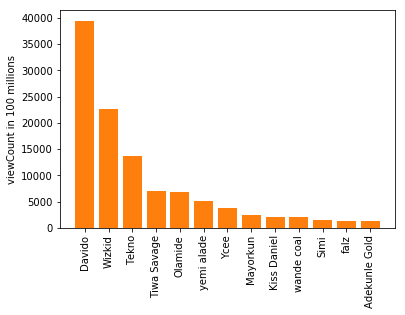

In [230]:
dislikes = total.sort_values(ascending=False, by='dislikeCount')
plt.bar(range(dislikes.shape[0]), dislikes['dislikeCount'])
plt.xticks(range(dislikes.shape[0]), dislikes['artistName'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()

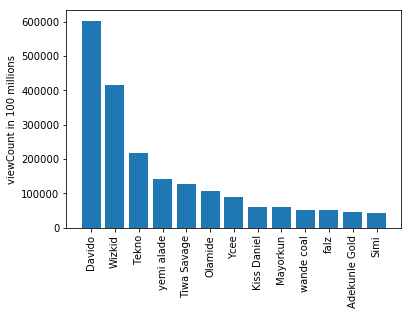

In [136]:
totalLikes = total.sort_values(ascending=False, by='likeCount')
plt.bar(range(totalLikes.shape[0]), totalLikes['likeCount'])
plt.xticks(range(totalLikes.shape[0]), totalLikes['artistName'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()

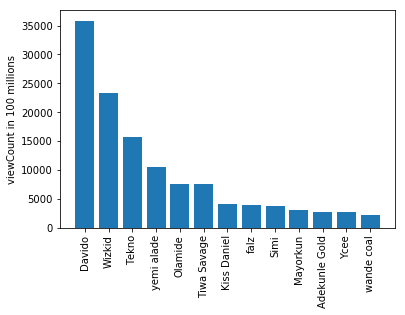

In [137]:
totalComments = total.sort_values(ascending=False, by='commentCount')
plt.bar(range(totalComments.shape[0]), totalComments['commentCount'])
plt.xticks(range(totalComments.shape[0]), totalComments['artistName'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()

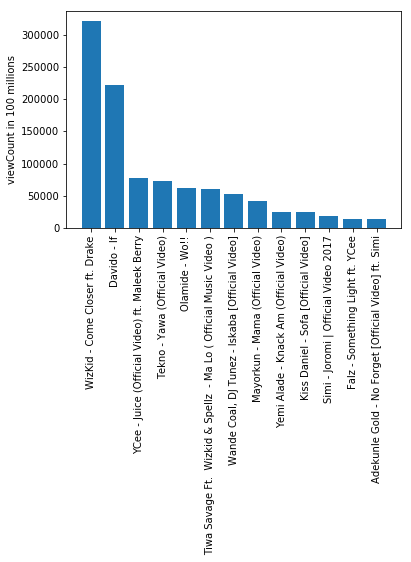

In [433]:
# Most Viewed song
mostLiked = likes.sort_values(ascending=False, by='likeCount')
plt.bar(range(mostLiked.shape[0]), mostLiked['likeCount'])
plt.xticks(range(mostLiked.shape[0]), mostLiked['title'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()


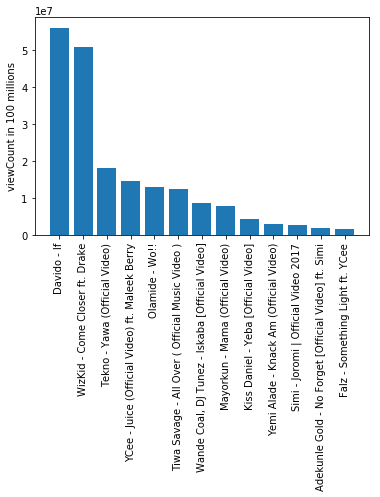

In [434]:
mostViewed = views.sort_values(ascending=False, by='viewCount')
plt.bar(range(mostViewed.shape[0]), mostViewed['viewCount'])
plt.xticks(range(mostViewed.shape[0]), mostViewed['title'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()


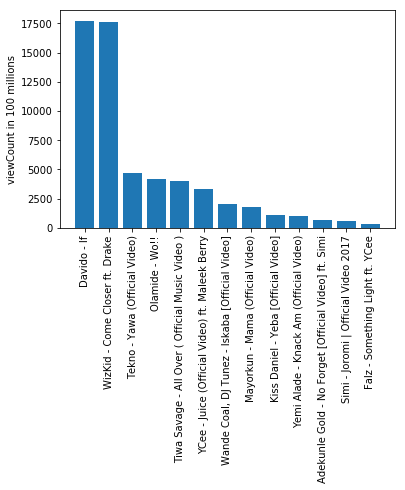

In [435]:
mostDisliked = dislikes.sort_values(ascending=False, by='dislikeCount')
plt.bar(range(mostDisliked.shape[0]), mostDisliked['dislikeCount'])
plt.xticks(range(mostDisliked.shape[0]), mostDisliked['title'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()


In [436]:
wizkid

,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,published,tags,title,videoId,viewCount
0,10,UCcBJoRL_QYkPlJaMhAUahvA,Tiwa Savage,3892,2707,0,61548,2017-11-03T07:06:57.000Z,"[tiwa savage, wizkid, spellz, ma lo, afrobeats]",Tiwa Savage Ft. Wizkid & Spellz - Ma Lo ( Of...,U4fqMMKo9ns,8643805
1,24,UCaBmOq7k-3ryqKJHkg_LDog,Hot Naija,19,31,0,495,2017-12-25T00:51:24.000Z,[],"WIZKID Signed A Kid, Hammed To Starboy & Gave ...",8T-7-luKPVY,65345
2,24,UCaBmOq7k-3ryqKJHkg_LDog,Hot Naija,75,40,0,1077,2017-12-25T01:18:36.000Z,[],WIZKID Brings Out DAVIDO At His Show As They P...,k7nox_BFPUU,88619
3,24,UCm13Lc7j4DmtAkSW5USBiiw,GoldMyneTV,40,34,0,876,2017-12-25T05:18:27.000Z,"[Goldmynetv, Goldmyne, Nigeria, music, song, s...",OLAMIDE'S PERFORMANCE AT WIZKID THE CONCERT,dtPfGfqZk-E,85098
4,10,UC7vc7LDFseM536d3HOTPQxg,Videowheels,143,65,0,1710,2017-12-25T07:04:11.000Z,"[Videowheels, Music, Nigeria, music, song, son...","WIZKID SIGNS YOUNG RAPPER, AHMED TO STARBOY WI...",anMOttn69Dc,104096
5,10,UCi7Cbr-F3zFQjwafFh5RWJA,StarBoy TV,1386,757,0,10125,2017-11-15T20:30:53.000Z,"[WIZKID - MANYA [OFFICIAL RELEASE], WIZKID, MA...",WIZKID - MANYA [OFFICIAL RELEASE],DBHH0_JtaCQ,2656140
6,10,UCf4uSpzq31CJ1PQWfOBd1FA,MUT4Y,628,283,0,7234,2017-11-19T11:45:37.000Z,"[WIZKID - MANYA [OFFICIAL RELEASE], WIZKID, MA...",MUT4Y FT WIZKID - MANYA (OFFICIAL VIDEO) 2017,-qMZMyH7pWU,890854
7,22,UC972VBuJ7t2gHtu_g_Kd7Lw,Skye9 NIGERIA,135,77,0,1328,2017-10-16T17:02:29.000Z,"[WIZKID, FELABRATION, PERFORMANCE]",WIZKID PERFORMANCE AT FELABRATION 2017,uRfml54HAf0,159511
8,24,UCUS_QkfIePZ7V1zhf_r5miA,KILARIGBO LIVE,24,14,0,246,2017-12-11T15:54:55.000Z,"[KILARIGBO LIVE, KILARIGBO, Nigeria, music, so...",Wizkid | Wande Coal | Tiwa Savage | Mr Eazi |P...,bw3kzIgfOgQ,19707
9,10,UCi7Cbr-F3zFQjwafFh5RWJA,StarBoy TV,82,12,0,739,2017-12-25T11:36:21.000Z,"[WIZKID, WATCH WIZKID THE CONCERT FULL VIDEO, ...",WATCH WIZKID THE CONCERT FULL VIDEO,ktrTK_kXDKM,16266


In [437]:
davido

,categoryId,channelId,channelTitle,commentCount,favoriteCount,published,tags,title,videoId,viewCount
0,10,UCQJOYS9v30qM74f6gZDk0TA,DavidoVEVO,5830,0,2017-11-11T08:00:00.000Z,"[Davido, FIA, Pop, Sony Music Entertainment In...",Davido - FIA (Official Video),8ORvJcpe2Oc,11688306
1,10,UCQJOYS9v30qM74f6gZDk0TA,DavidoVEVO,3545,0,2017-11-24T08:00:03.000Z,"[Davido, Like Dat, Pop, Sony Music Entertainme...",Davido - Like Dat (Official Video),gJPt8ruo2BQ,2322208
2,10,UCQJOYS9v30qM74f6gZDk0TA,DavidoVEVO,10332,0,2017-06-02T07:00:01.000Z,"[Pop, Fall, Davido, Sony Music Entertainment I...",Davido - Fall,3Iyuym-Gci0,40394638
3,24,UCF5HsNKF1XIZKs8kSXNfbeg,Flip Tv,34,0,2017-12-18T21:26:37.000Z,"[Flip Tv, Flip, Funny, Humor, Joke, Jokes, Lau...","DAVIDO SETTLES FIGHT WITH DELE MOMODU, PROSTRA...",UDCv5TmbWKk,65896
4,10,UCQJOYS9v30qM74f6gZDk0TA,DavidoVEVO,5348,0,2017-07-28T10:00:01.000Z,"[Davido feat. Rae Sremmurd & Young Thug, Pere,...",Davido - Pere (Official Video) ft. Rae Sremmur...,ZOReWvr536Y,4374883
5,24,UCUS_QkfIePZ7V1zhf_r5miA,KILARIGBO LIVE,63,0,2017-12-25T06:24:58.000Z,"[KILARIGBO LIVE, KILARIGBO, Nigeria, music, so...",Davido Joins Wizkid On Stage | As Star Boy Giv...,MZb9OBsL1CI,70515
6,24,UCaBmOq7k-3ryqKJHkg_LDog,Hot Naija,75,0,2017-12-25T01:18:36.000Z,[],WIZKID Brings Out DAVIDO At His Show As They P...,k7nox_BFPUU,88618
7,10,UCsOBsZVFWqri5YD37rh2fgg,Lynx Entertainment,431,0,2017-12-13T11:38:49.000Z,"[kidi, mayorkun, davido, ghana music, naija mu...",KiDi ft Mayorkun & Davido - Odo Remix (Officia...,CsUhFXFUzJc,540152
8,10,UCQJOYS9v30qM74f6gZDk0TA,DavidoVEVO,10783,0,2017-02-17T08:00:02.000Z,"[Pop, Davido, If, Sony Music Entertainment Int...",Davido - If,helEv0kGHd4,56166925
9,24,UCWcD5_h_H7SyTfge00aOxEg,F78tvNews,131,0,2017-11-30T02:55:45.000Z,"[davido, wizkid, mobo awards 2017, BET awards,...",FACTORY78: Davido performance at the MOBO Awar...,wc4wKcjy02w,107799


In [ ]:
# feedIn[feedIn['Total'].astype == 'int
# feedIn.dtypes
# feeadIn.select_dtypes(include=['float'])
# ma = feedIn[numeric_dtype].max().values
feedIn[numeric_dtype][:-1].max().values
# feedIn.loc['Total']
# feedIn

In [ ]:
# Put each total into a df
# total = pd.DataFrame(columns=numeric_dtype)
# total.loc[len(total)] = feedIn.loc['Total'].values
# total
# ma
feedIn[numeric_dtype]
# maximum.loc[len(maximum)] = feedIn[numeric_dtype].max().values
# maximum

In [ ]:
numeric_dtype = ['viewCount','commentCount','likeCount','dislikeCount','favoriteCount']

In [ ]:
for artist in artistData:
    for item in numeric_dtype:

In [ ]:
for item in numeric_dtype:
    falz[item] = falz[item].astype(int)

In [ ]:
falz = falz.sort_values(ascending=False, by='viewCount')
plt.bar(range(falz.shape[0]), falz['viewCount'])
plt.xticks(range(falz.shape[0]), falz['title'], rotation=90)
plt.ylabel('viewCount in 100 millions')
plt.show()

In [ ]:
falz.shape

In [138]:
wizkid

,categoryId,channelId,channelTitle,commentCount,dislikeCount,favoriteCount,likeCount,published,tags,title,videoId,viewCount
0,10,UCcBJoRL_QYkPlJaMhAUahvA,Tiwa Savage,3892,2707,0,61548,2017-11-03T07:06:57.000Z,"[tiwa savage, wizkid, spellz, ma lo, afrobeats]",Tiwa Savage Ft. Wizkid & Spellz - Ma Lo ( Of...,U4fqMMKo9ns,8643805
1,24,UCaBmOq7k-3ryqKJHkg_LDog,Hot Naija,19,31,0,495,2017-12-25T00:51:24.000Z,[],"WIZKID Signed A Kid, Hammed To Starboy & Gave ...",8T-7-luKPVY,65345
2,24,UCaBmOq7k-3ryqKJHkg_LDog,Hot Naija,75,40,0,1077,2017-12-25T01:18:36.000Z,[],WIZKID Brings Out DAVIDO At His Show As They P...,k7nox_BFPUU,88619
3,24,UCm13Lc7j4DmtAkSW5USBiiw,GoldMyneTV,40,34,0,876,2017-12-25T05:18:27.000Z,"[Goldmynetv, Goldmyne, Nigeria, music, song, s...",OLAMIDE'S PERFORMANCE AT WIZKID THE CONCERT,dtPfGfqZk-E,85098
4,10,UC7vc7LDFseM536d3HOTPQxg,Videowheels,143,65,0,1710,2017-12-25T07:04:11.000Z,"[Videowheels, Music, Nigeria, music, song, son...","WIZKID SIGNS YOUNG RAPPER, AHMED TO STARBOY WI...",anMOttn69Dc,104096
5,10,UCi7Cbr-F3zFQjwafFh5RWJA,StarBoy TV,1386,757,0,10125,2017-11-15T20:30:53.000Z,"[WIZKID - MANYA [OFFICIAL RELEASE], WIZKID, MA...",WIZKID - MANYA [OFFICIAL RELEASE],DBHH0_JtaCQ,2656140
6,10,UCf4uSpzq31CJ1PQWfOBd1FA,MUT4Y,628,283,0,7234,2017-11-19T11:45:37.000Z,"[WIZKID - MANYA [OFFICIAL RELEASE], WIZKID, MA...",MUT4Y FT WIZKID - MANYA (OFFICIAL VIDEO) 2017,-qMZMyH7pWU,890854
7,22,UC972VBuJ7t2gHtu_g_Kd7Lw,Skye9 NIGERIA,135,77,0,1328,2017-10-16T17:02:29.000Z,"[WIZKID, FELABRATION, PERFORMANCE]",WIZKID PERFORMANCE AT FELABRATION 2017,uRfml54HAf0,159511
8,24,UCUS_QkfIePZ7V1zhf_r5miA,KILARIGBO LIVE,24,14,0,246,2017-12-11T15:54:55.000Z,"[KILARIGBO LIVE, KILARIGBO, Nigeria, music, so...",Wizkid | Wande Coal | Tiwa Savage | Mr Eazi |P...,bw3kzIgfOgQ,19707
9,10,UCi7Cbr-F3zFQjwafFh5RWJA,StarBoy TV,82,12,0,739,2017-12-25T11:36:21.000Z,"[WIZKID, WATCH WIZKID THE CONCERT FULL VIDEO, ...",WATCH WIZKID THE CONCERT FULL VIDEO,ktrTK_kXDKM,16266
